In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [2]:
data = pd.read_csv("600280.SS.csv")

In [3]:
## Calculate Return
data = data.reset_index()
data["shift"] =  data["Adj Close"].shift()
data["Return"] = (data["Adj Close"] - data["shift"])/data["shift"]
data = data.drop(["Open", "High", "Low", "shift"], axis = 1)
data = data.drop(["index"], axis = 1).iloc[1:,:]
data

,Date,Close,Adj Close,Volume,Return
1,2000-09-27,1.794982,1.523565,74228665.0,0.012195
2,2000-09-28,1.801470,1.529072,50998771.0,0.003615
3,2000-09-29,1.840397,1.562113,31769256.0,0.021609
4,2000-10-02,NaN,NaN,NaN,NaN
5,2000-10-03,NaN,NaN,NaN,NaN
6,2000-10-04,NaN,NaN,NaN,NaN
7,2000-10-05,NaN,NaN,NaN,NaN
8,2000-10-06,NaN,NaN,NaN,NaN
9,2000-10-09,1.814446,1.540086,18375794.0,NaN
10,2000-10-10,1.886894,1.601579,24968813.0,0.039928


In [4]:
## Select Specific Date
stock_data = data
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
start_date = "2017-09-13"; end_date = "2022-09-16"
period = (stock_data['Date'] > start_date) & (stock_data['Date'] <= end_date)
stock_data = stock_data.loc[period]
stock_data

,Date,Close,Adj Close,Volume,Return
4222,2017-09-14,8.37,8.355717,7800452.0,-0.005938
4223,2017-09-15,8.53,8.515444,10174073.0,0.019116
4224,2017-09-18,8.63,8.615273,12723794.0,0.011723
4225,2017-09-19,8.59,8.575341,14128322.0,-0.004635
4226,2017-09-20,8.60,8.585324,5468004.0,0.001164
4227,2017-09-21,8.55,8.535410,4937269.0,-0.005814
4228,2017-09-22,8.45,8.435580,5162056.0,-0.011696
4229,2017-09-25,8.20,8.186007,5231832.0,-0.029586
4230,2017-09-26,8.38,8.365700,5057239.0,0.021951
4231,2017-09-27,8.53,8.515444,6835968.0,0.017900


In [5]:
def calculate_coef(df, num, period, col_name):
    stock_each_df_list_period = []
    for i in range(num+1):
        each_stock_data = df.iloc[i*period:(i+1)*period, :]
        stock_each_df_list_period.append(each_stock_data)
    corr_coef_list_period = []
    for i in range(len(stock_each_df_list_period)-1):
        corr_coef = np.corrcoef(stock_each_df_list_period[0][col_name].tolist(),stock_each_df_list_period[i+1][col_name].tolist())
        corr_coef_list_period.append(corr_coef[0,1])
    return corr_coef_list_period

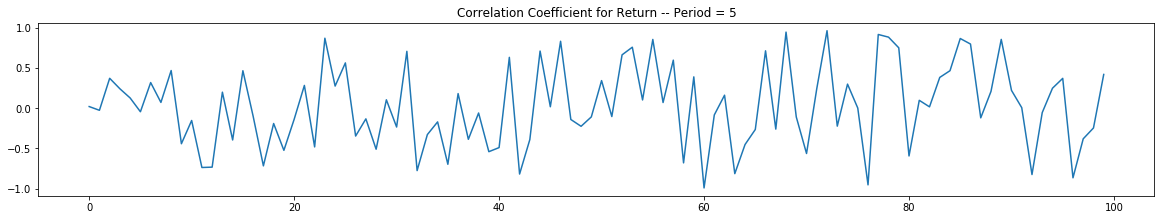

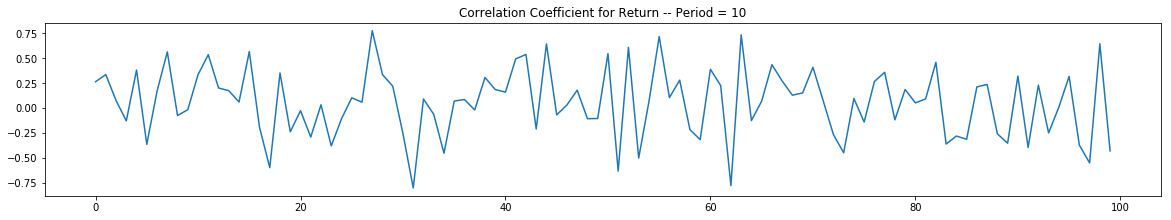

In [6]:
### Problem 1 (1)
stock_data_reverse = stock_data.sort_values(["Date"], ascending = False)
corr_coef_list_5 = calculate_coef(stock_data_reverse, 100, 5, "Return")
corr_coef_list_10 = calculate_coef(stock_data_reverse, 100, 10, "Return")
## Plot
plt.figure(figsize=(20, 7)) 
plt.subplot(2,1,1)
plt.title("Correlation Coefficient for Return -- Period = 5")  
plt.plot(corr_coef_list_5)
plt.figure(figsize=(20, 7)) 
plt.subplot(2,1,2)
plt.title("Correlation Coefficient for Return -- Period = 10")  
plt.plot(corr_coef_list_10)
plt.show()

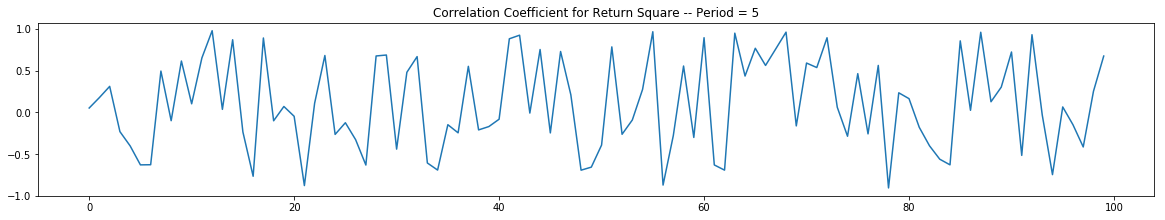

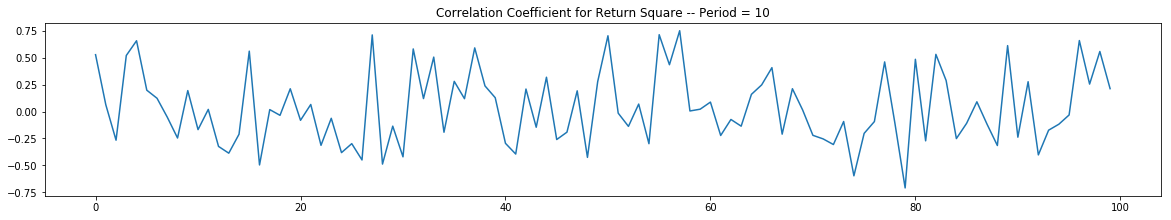

In [7]:
### Problem 1 (2)
stock_data_reverse_square = stock_data.sort_values(["Date"], ascending = False)
stock_data_reverse_square["Return_square"] = stock_data_reverse_square["Return"]**2
corr_coef_list_5 = calculate_coef(stock_data_reverse_square, 100, 5, "Return_square")
corr_coef_list_10 = calculate_coef(stock_data_reverse_square, 100, 10, "Return_square")
## Plot
plt.figure(figsize=(20, 7)) 
plt.subplot(2,1,1)
plt.title("Correlation Coefficient for Return Square -- Period = 5")  
plt.plot(corr_coef_list_5)
plt.figure(figsize=(20, 7)) 
plt.subplot(2,1,2)
plt.title("Correlation Coefficient for Return Square -- Period = 10")  
plt.plot(corr_coef_list_10)
plt.show()

In [8]:
def calcuate_rate(list_, period):
    result_list = []; name_list = []
    for i in range(int(100/period)):
        result_list.append(round(len([k for k in list_[0:period*(i+1)] if k > 0])/len(list_[:period*(i+1)]),3))
        name_list.append("Top "+str((i+1)*period))
    return pd.DataFrame({"名称":name_list, "占比":result_list})

In [9]:
calcuate_rate(corr_coef_list_5,5)

,名称,占比
0,Top 5,0.600
1,Top 10,0.500
2,Top 15,0.667
3,Top 20,0.600
4,Top 25,0.560
5,Top 30,0.533
6,Top 35,0.514
7,Top 40,0.475
8,Top 45,0.489
9,Top 50,0.480


In [10]:
calcuate_rate(corr_coef_list_10,5)

,名称,占比
0,Top 5,0.800
1,Top 10,0.700
2,Top 15,0.533
3,Top 20,0.550
4,Top 25,0.480
5,Top 30,0.433
6,Top 35,0.457
7,Top 40,0.525
8,Top 45,0.511
9,Top 50,0.500


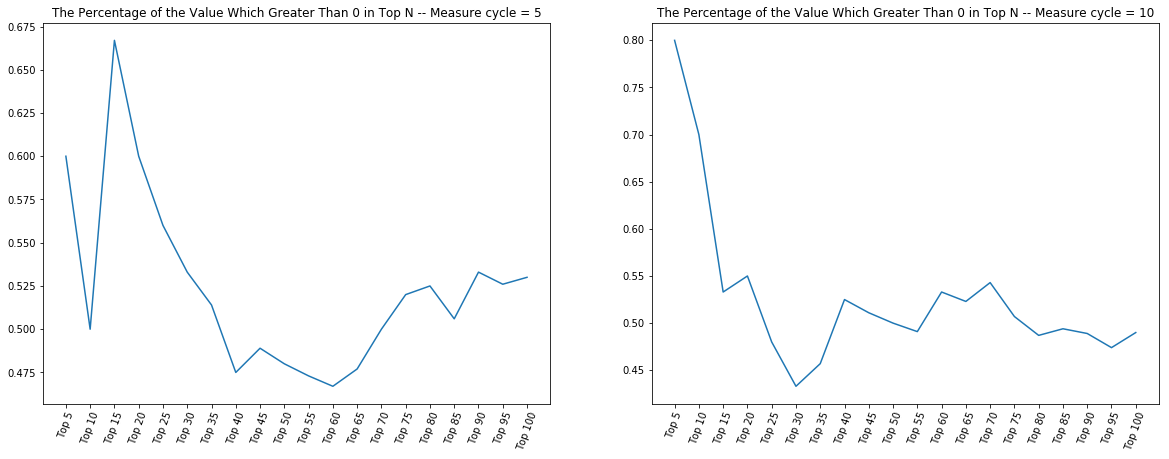

In [11]:
## Plot
plt.figure(figsize=(20, 7)) 
plt.subplot(1,2,1)
plt.title("The Percentage of the Value Which Greater Than 0 in Top N -- Measure cycle = 5")  
plt.xticks(rotation=70)
plt.plot(calcuate_rate(corr_coef_list_5,5)["名称"].tolist(), calcuate_rate(corr_coef_list_5,5)["占比"].tolist())
plt.subplot(1,2,2)
plt.title("The Percentage of the Value Which Greater Than 0 in Top N -- Measure cycle = 10") 
plt.xticks(rotation=70)
plt.plot(calcuate_rate(corr_coef_list_10,5)["名称"].tolist(), calcuate_rate(corr_coef_list_10,5)["占比"].tolist())
plt.show()

In [12]:
## Problem 2
def df_cal(df, start_date, end_date):
    period = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    stock_each_period_df = df.loc[period]
    return stock_each_period_df

In [13]:
# df_1 = pd.DataFrame(df_cal(stock_data, "2021-09-16", "2022-09-15")["Return"])
# df_1.rename(columns = {"Return": "Return_1"}, inplace = True)
# df_2 = pd.DataFrame(df_cal(stock_data, "2021-09-17", "2022-09-16")["Return"])
# df_2.rename(columns = {"Return": "Return_2"}, inplace = True)

In [14]:
def generate_date(df, starting_date, starting_next_date, ending_date, ending_next_date):
    df_1 = pd.DataFrame(df_cal(df, starting_date, ending_date)["Return"])
    df_1.rename(columns = {"Return": "Return_1"}, inplace = True)
    df_2 = pd.DataFrame(df_cal(df, starting_next_date, ending_next_date)["Return"])
    df_2.rename(columns = {"Return": "Return_2"}, inplace = True)
    return df_1, df_2

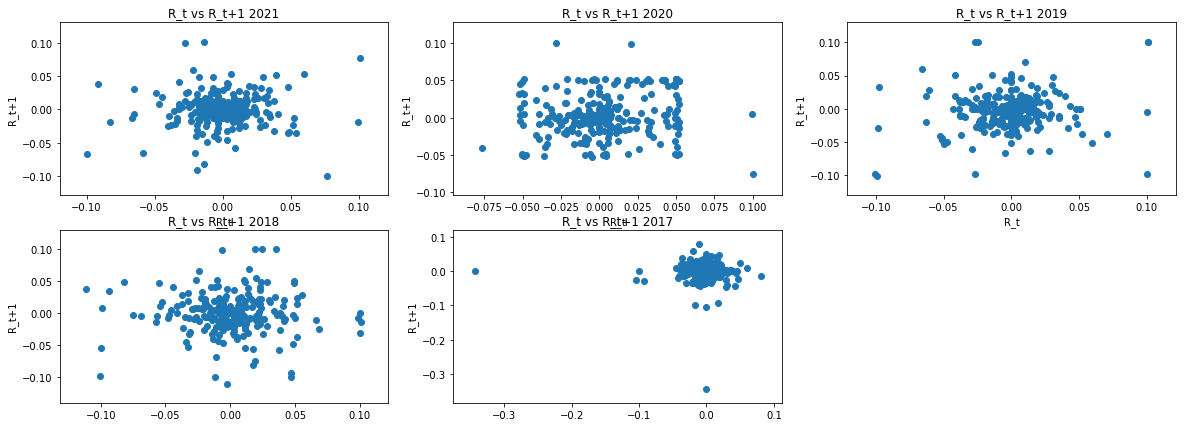

In [15]:
# 2021
plt.figure(figsize=(20, 7)) 
plt.subplot(2,3,1)
plt.scatter(generate_date(stock_data, "2021-09-16", "2021-09-17", "2022-09-15", "2022-09-16")[0], 
            generate_date(stock_data, "2021-09-16", "2021-09-17", "2022-09-15", "2022-09-16")[1])
plt.title('R_t vs R_t+1 2021')
plt.xlabel('R_t')
plt.ylabel('R_t+1')
# 2020
plt.subplot(2,3,2)
plt.scatter(generate_date(stock_data, "2020-09-16", "2020-09-17", "2021-09-15", "2021-09-16")[0], 
            generate_date(stock_data, "2020-09-16", "2020-09-17", "2021-09-15", "2021-09-16")[1])
plt.title('R_t vs R_t+1 2020')
plt.xlabel('R_t')
plt.ylabel('R_t+1')
# 2019
plt.subplot(2,3,3)
plt.scatter(generate_date(stock_data, "2019-09-16", "2019-09-17", "2020-09-15", "2020-09-16")[0], 
            generate_date(stock_data, "2019-09-16", "2019-09-17", "2020-09-15", "2020-09-16")[1])
plt.title('R_t vs R_t+1 2019')
plt.xlabel('R_t')
plt.ylabel('R_t+1')
# 2018
plt.subplot(2,3,4)
plt.scatter(generate_date(stock_data, "2018-09-14", "2018-09-17", "2019-09-15", "2019-09-16")[0], 
            generate_date(stock_data, "2018-09-14", "2018-09-17", "2019-09-15", "2019-09-16")[1])
plt.title('R_t vs R_t+1 2018')
plt.ylabel('R_t+1')
# 2017
plt.subplot(2,3,5)
plt.scatter(generate_date(stock_data, "2017-09-15", "2017-09-18", "2018-09-14", "2018-09-17")[0], 
            generate_date(stock_data, "2017-09-15", "2017-09-18", "2018-09-14", "2018-09-17")[1])
plt.title('R_t vs R_t+1 2017')
plt.ylabel('R_t+1')
plt.show()

In [16]:
## 2021
X = np.array(generate_date(stock_data, "2021-09-16", "2021-09-17", "2022-09-15", "2022-09-16")[0])
y = np.array(generate_date(stock_data, "2021-09-16", "2021-09-17", "2022-09-15", "2022-09-16")[1])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6192
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.432
Time:                        00:16:03   Log-Likelihood:                 542.67
No. Observations:                 241   AIC:                            -1083.
Df Residuals:                     240   BIC:                            -1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0508      0.065      0.787      0.4

In [17]:
## 2020
X = np.array(generate_date(stock_data, "2020-09-16", "2020-09-17", "2021-09-15", "2021-09-16")[0])
y = np.array(generate_date(stock_data, "2020-09-16", "2020-09-17", "2021-09-15", "2021-09-16")[1])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.775
Date:                Wed, 26 Oct 2022   Prob (F-statistic):             0.0298
Time:                        00:16:04   Log-Likelihood:                 510.32
No. Observations:                 244   AIC:                            -1019.
Df Residuals:                     243   BIC:                            -1015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1389      0.064      2.185      0.0

In [18]:
## 2019
X = np.array(generate_date(stock_data, "2019-09-16", "2019-09-17", "2020-09-15", "2020-09-16")[0])
y = np.array(generate_date(stock_data, "2019-09-16", "2019-09-17", "2020-09-15", "2020-09-16")[1])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     4.744
Date:                Wed, 26 Oct 2022   Prob (F-statistic):             0.0304
Time:                        00:16:04   Log-Likelihood:                 520.70
No. Observations:                 244   AIC:                            -1039.
Df Residuals:                     243   BIC:                            -1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1384      0.064      2.178      0.0

In [19]:
## 2018
X = np.array(generate_date(stock_data, "2018-09-14", "2018-09-17", "2019-09-15", "2019-09-16")[0])
y = np.array(generate_date(stock_data, "2018-09-14", "2018-09-17", "2019-09-15", "2019-09-16")[1])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1146
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.735
Time:                        00:16:05   Log-Likelihood:                 488.17
No. Observations:                 240   AIC:                            -974.3
Df Residuals:                     239   BIC:                            -970.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0219      0.065     -0.338      0.7

In [20]:
#2017
X = np.array(generate_date(stock_data, "2017-09-15", "2017-09-18", "2018-09-14", "2018-09-17")[0])
y = np.array(generate_date(stock_data, "2017-09-15", "2017-09-18", "2018-09-14", "2018-09-17")[1])
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02907
Date:                Wed, 26 Oct 2022   Prob (F-statistic):              0.865
Time:                        00:16:06   Log-Likelihood:                 506.48
No. Observations:                 245   AIC:                            -1011.
Df Residuals:                     244   BIC:                            -1007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0110      0.064      0.170      0.8